In [8]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [9]:
import pandas as pd
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [10]:
df = pd.read_csv('results.csv', index_col=0)

In [11]:
df['type'] = df['type'].apply(lambda x: 'aggressive' if x=='da' else x)

In [12]:
df.head()

,fold,patient,dice,TP,TN,FP,FN,n_pred,n_ref,precision,recall,type,view,dilated_dice
0,fold_0,1525150.nii,0.000000,0,8623817,0,183,0,183,0.000000,0.000000,normal,axial,0.000000
1,fold_0,1837909.nii,0.009756,4,9877584,0,812,4,816,1.000000,0.004902,normal,axial,0.023171
2,fold_0,1856568.nii,0.580206,2984,5374842,717,3601,3701,6585,0.806269,0.453151,normal,axial,0.715341
3,fold_0,324035.nii,0.000000,0,4504974,231,395,231,395,0.000000,0.000000,normal,axial,0.000000
4,fold_0,390232.nii,0.299465,616,5378646,772,2110,1388,2726,0.443804,0.225972,normal,axial,0.402042


# Dice

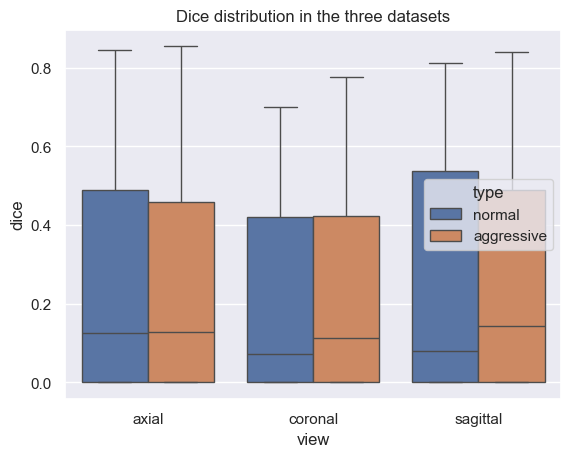

In [13]:
sns.boxplot(x=df['view'], y=df['dice'], hue=df['type'])
plt.title('Dice distribution in the three datasets')

plt.savefig('./images/dice_planes.pdf', bbox_inches='tight', pad_inches=0)

In [14]:
df.groupby(['view', 'type'])[['dice']].describe().round(3)

dice                                             
                    count   mean    std  min  25%    50%    75%    max
view     type                                                         
axial    aggressive  59.0  0.243  0.274  0.0  0.0  0.129  0.459  0.854
         normal      59.0  0.245  0.281  0.0  0.0  0.126  0.489  0.844
coronal  aggressive  59.0  0.219  0.252  0.0  0.0  0.114  0.424  0.777
         normal      59.0  0.201  0.243  0.0  0.0  0.071  0.421  0.700
sagittal aggressive  60.0  0.260  0.281  0.0  0.0  0.143  0.490  0.841
         normal      60.0  0.247  0.287  0.0  0.0  0.081  0.537  0.813

In [15]:
from scipy.stats import ranksums

sample1 = df[(df.view == 'axial') & (df.type == 'normal')]['dice']
sample2 = df[(df.view == 'axial') & (df.type == 'aggressive')]['dice']

ranksums(sample1, sample2)

RanksumsResult(statistic=-0.024220195506227126, pvalue=0.980676969170288)

In [16]:
from scipy.stats import ranksums

sample1 = df[(df.view == 'coronal') & (df.type == 'normal')]['dice']
sample2 = df[(df.view == 'coronal') & (df.type == 'aggressive')]['dice']

ranksums(sample1, sample2)

RanksumsResult(statistic=-0.5570644966432239, pvalue=0.577483363593341)

In [17]:
from scipy.stats import ranksums

sample1 = df[(df.view == 'sagittal') & (df.type == 'normal')]['dice']
sample2 = df[(df.view == 'sagittal') & (df.type == 'aggressive')]['dice']

ranksums(sample1, sample2)

RanksumsResult(statistic=-0.1837023583785173, pvalue=0.8542469586789013)

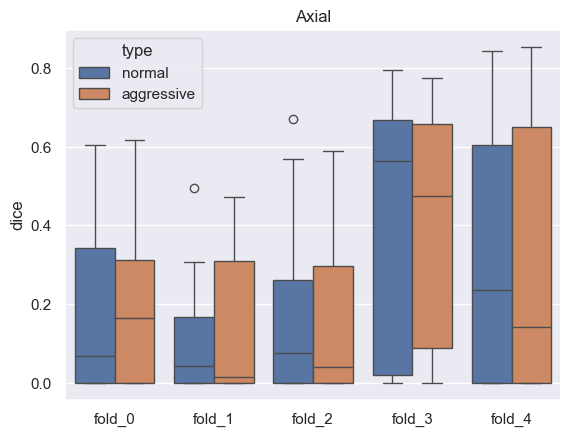

In [18]:
df_1 = df[df.view=='axial']
sns.boxplot(y=df_1['dice'], x=df_1['fold'], hue=df_1['type']).set(xlabel=None)
plt.title('Axial')
plt.savefig('./images/axial_folds.pdf', bbox_inches='tight', pad_inches=0)

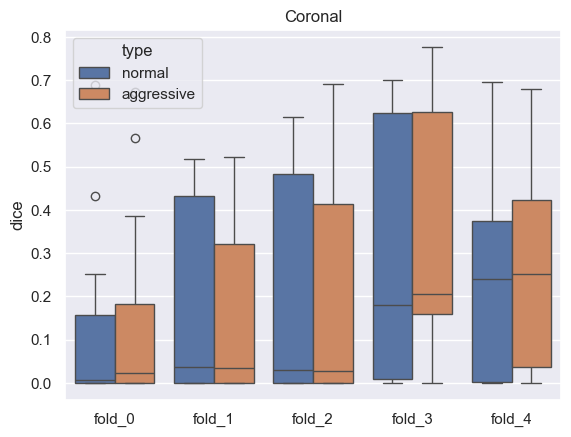

In [19]:
df_1 = df[df.view=='coronal']
sns.boxplot(y=df_1['dice'], x=df_1['fold'], hue=df_1['type']).set(xlabel=None)
plt.title('Coronal')
plt.savefig('./images/coronal_folds.pdf', bbox_inches='tight', pad_inches=0)

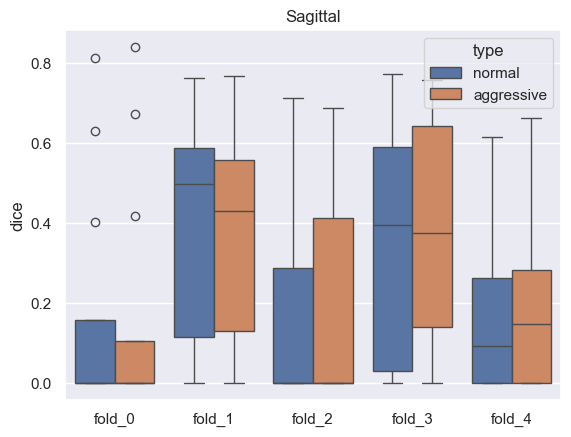

In [20]:
df_1 = df[df.view=='sagittal']
sns.boxplot(y=df_1['dice'], x=df_1['fold'], hue=df_1['type']).set(xlabel=None)
plt.title('Sagittal')
plt.savefig('./images/sagittal_folds.pdf', bbox_inches='tight', pad_inches=0)

Text(0.5, 1.0, 'sagittal')

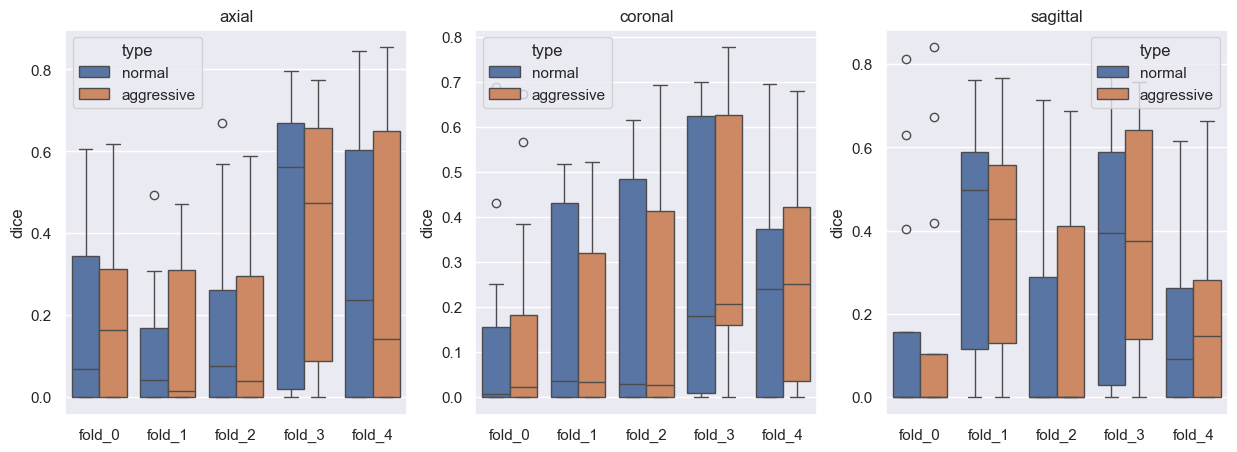

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
df_1 = df[df.view=='axial']
sns.boxplot(y=df_1['dice'], x=df_1['fold'], hue=df_1['type']).set(xlabel=None)
plt.title('axial')

plt.subplot(1,3,2)
df_1 = df[df.view=='coronal']
sns.boxplot(y=df_1['dice'], x=df_1['fold'], hue=df_1['type']).set(xlabel=None)
plt.title('coronal')


plt.subplot(1,3,3)
df_1 = df[df.view=='sagittal']
sns.boxplot(y=df_1['dice'], x=df_1['fold'], hue=df_1['type']).set(xlabel=None)
plt.title('sagittal')

In [22]:
df_dice_0 = df[df.dice == 0]
df_dice_0.groupby(['view', 'type']).count()

fold  patient  dice  TP  TN  FP  FN  n_pred  n_ref  \
view     type                                                             
axial    aggressive    19       19    19  19  19  19  19      19     19   
         normal        20       20    20  20  20  20  20      20     20   
coronal  aggressive    20       20    20  20  20  20  20      20     20   
         normal        24       24    24  24  24  24  24      24     24   
sagittal aggressive    26       26    26  26  26  26  26      26     26   
         normal        26       26    26  26  26  26  26      26     26   

                     precision  recall  dilated_dice  
view     type                                         
axial    aggressive         19      19            19  
         normal             20      20            20  
coronal  aggressive         20      20            20  
         normal             24      24            24  
sagittal aggressive         26      26            26  
         normal             26      26            26

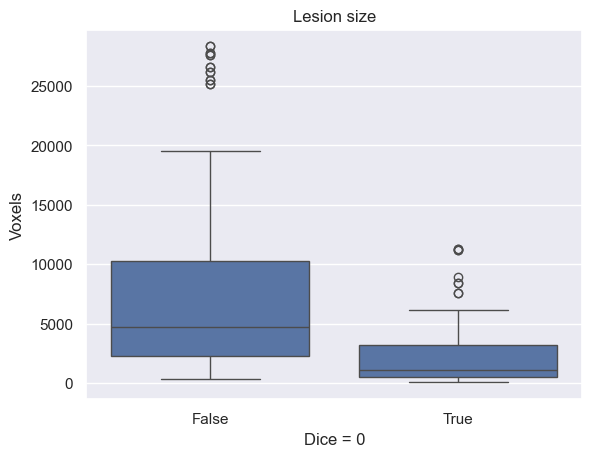

In [23]:
df['dice0'] = df['dice'].apply(lambda x: True if x==0 else False)
sns.boxplot(data=df[df.n_ref<40000], x='dice0', y='n_ref')
plt.xlabel('Dice = 0')
plt.ylabel('Voxels')
plt.title('Lesion size')
plt.savefig('./images/dice0_size.pdf', bbox_inches='tight', pad_inches=0)

In [24]:
sample1 = df[df.dice0 == True]['n_ref']
sample2 = df[df.dice0 == False]['n_ref']

ranksums(sample1, sample2)

RanksumsResult(statistic=-9.253592243870518, pvalue=2.1707190647659425e-20)

In [25]:
def healty_or_allucination(n_pred):
    if n_pred == 0:
        return 'healthy'
    else:
        return 'hallucination'

df_dice_0['reason'] = df_dice_0['n_pred'].apply(lambda x: healty_or_allucination(x))


/tmp/ipykernel_295564/3164767350.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dice_0['reason'] = df_dice_0['n_pred'].apply(lambda x: healty_or_allucination(x))


In [26]:
df_dice_0.groupby(['view', 'reason', 'type']).count()

fold  patient  dice  TP  TN  FP  FN  \
view     reason        type                                              
axial    hallucination aggressive    15       15    15  15  15  15  15   
                       normal        10       10    10  10  10  10  10   
         healthy       aggressive     4        4     4   4   4   4   4   
                       normal        10       10    10  10  10  10  10   
coronal  hallucination aggressive    12       12    12  12  12  12  12   
                       normal         9        9     9   9   9   9   9   
         healthy       aggressive     8        8     8   8   8   8   8   
                       normal        15       15    15  15  15  15  15   
sagittal hallucination aggressive    12       12    12  12  12  12  12   
                       normal        10       10    10  10  10  10  10   
         healthy       aggressive    14       14    14  14  14  14  14   
                       normal        16       16    16  16  16  16  16   

                                   n_pred  n_ref  precision  recall  \
view     reason        type                                           
axial    hallucination aggressive      15     15         15      15   
                       normal          10     10         10      10   
         healthy       aggressive       4      4          4       4   
                       normal          10     10         10      10   
coronal  hallucination aggressive      12     12         12      12   
                       normal           9      9          9       9   
         healthy       aggressive       8      8          8       8   
                       normal          15     15         15      15   
sagittal hallucination aggressive      12     12         12      12   
                       normal          10     10         10      10   
         healthy       aggressive      14     14         14      14   
                       normal          16     16         16      16   

                                   dilated_dice  
view     reason        type                      
axial    hallucination aggressive            15  
                       normal                10  
         healthy       aggressive             4  
                       normal                10  
coronal  hallucination aggressive            12  
                       normal                 9  
         healthy       aggressive             8  
                       normal                15  
sagittal hallucination aggressive            12  
                       normal                10  
         healthy       aggressive            14  
                       normal                16

In [27]:
df_dice_0.groupby(['view','reason', 'type'])[['patient']].count()

patient
view     reason        type               
axial    hallucination aggressive       15
                       normal           10
         healthy       aggressive        4
                       normal           10
coronal  hallucination aggressive       12
                       normal            9
         healthy       aggressive        8
                       normal           15
sagittal hallucination aggressive       12
                       normal           10
         healthy       aggressive       14
                       normal           16

In [28]:
# mix viste

df_temp = df.groupby('patient')[['view']].count()
idx = df_temp[df_temp.view!=6].index
df_all_views = df[~df['patient'].isin(idx)]
df_all_views

,fold,patient,dice,TP,TN,FP,FN,n_pred,n_ref,precision,recall,type,view,dilated_dice,dice0
0,fold_0,1525150.nii,0.000000,0,8623817,0,183,0,183,0.000000,0.000000,normal,axial,0.000000,True
2,fold_0,1856568.nii,0.580206,2984,5374842,717,3601,3701,6585,0.806269,0.453151,normal,axial,0.715341,False
3,fold_0,324035.nii,0.000000,0,4504974,231,395,231,395,0.000000,0.000000,normal,axial,0.000000,True
4,fold_0,390232.nii,0.299465,616,5378646,772,2110,1388,2726,0.443804,0.225972,normal,axial,0.402042,False
5,fold_0,5018199.nii,0.000000,0,3357868,0,852,0,852,0.000000,0.000000,normal,axial,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,fold_4,5283984.nii,0.379966,1927,56991720,2409,3880,4336,5807,0.444419,0.331841,aggressive,sagittal,0.500049,False
352,fold_4,928807.nii,0.221811,360,7200954,1206,1320,1566,1680,0.229885,0.214286,aggressive,sagittal,0.416513,False
353,fold_4,928807_1.nii,0.000000,0,56991489,0,8447,0,8447,0.000000,0.000000,aggressive,sagittal,0.000000,True
354,fold_4,94628.nii,0.249403,2296,56983820,394,13426,2690,15722,0.853532,0.146037,aggressive,sagittal,0.382142,False


In [29]:
df_all_views.drop('fold', axis=1).groupby(['patient','type', 'view']).mean()

dice      TP         TN      FP      FN  \
patient     type       view                                                    
1354168.nii aggressive axial     0.473532  2299.0  6159629.0   534.0  4578.0   
                       coronal   0.691859  5511.0  5903180.0  1760.0  3149.0   
                       sagittal  0.438290  2548.0  6227081.0  1077.0  5454.0   
            normal     axial     0.434716  1986.0  6159889.0   274.0  4891.0   
                       coronal   0.615223  4393.0  5903712.0  1228.0  4267.0   
...                                   ...     ...        ...     ...     ...   
9571.nii    aggressive coronal   0.390789   297.0  5912377.0   442.0   484.0   
                       sagittal  0.000000     0.0  5166230.0     5.0   869.0   
            normal     axial     0.000000     0.0  5605318.0   408.0   674.0   
                       coronal   0.333065   207.0  5912564.0   255.0   574.0   
                       sagittal  0.000000     0.0  5166235.0     0.0   869.0   

                                 n_pred   n_ref  precision    recall  \
patient     type       view                                            
1354168.nii aggressive axial     2833.0  6877.0   0.811507  0.334303   
                       coronal   7271.0  8660.0   0.757943  0.636374   
                       sagittal  3625.0  8002.0   0.702897  0.318420   
            normal     axial     2260.0  6877.0   0.878761  0.288789   
                       coronal   5621.0  8660.0   0.781534  0.507275   
...                                 ...     ...        ...       ...   
9571.nii    aggressive coronal    739.0   781.0   0.401894  0.380282   
                       sagittal     5.0   869.0   0.000000  0.000000   
            normal     axial      408.0   674.0   0.000000  0.000000   
                       coronal    462.0   781.0   0.448052  0.265045   
                       sagittal     0.0   869.0   0.000000  0.000000   

                                 dilated_dice  dice0  
patient     type       view                           
1354168.nii aggressive axial         0.627085    0.0  
                       coronal       0.953110    0.0  
                       sagittal      0.676099    0.0  
            normal     axial         0.592755    0.0  
                       coronal       0.875919    0.0  
...                                       ...    ...  
9571.nii    aggressive coronal       0.765789    0.0  
                       sagittal      0.000000    1.0  
            normal     axial         0.000000    1.0  
                       coronal       0.768302    0.0  
                       sagittal      0.000000    1.0  

[342 rows x 11 columns]

In [30]:
df_temp = df_all_views[df_all_views.type == 'normal'].groupby('patient')[['dice']].mean()
idx = df_temp[df_temp.dice == 0].index
print(f'Pazienti con dice 0 in tutte le viste: {len(idx)}')


df_sani = df_dice_0[(df_dice_0.reason == 'healthy') & (df_dice_0.type == 'normal')]
df_temp = df_sani.groupby('patient')[['view']].count()
idx = df_temp[df_temp.view == 3].index
print(f'Pazienti senza lesioni in tutte le viste: {len(idx)}')


df_allucinati = df_dice_0[(df_dice_0.reason == 'hallucination') & (df_dice_0.type == 'normal')]
df_temp = df_allucinati.groupby('patient')[['view']].count()
idx = df_temp[df_temp.view == 3].index
print(f'Pazienti con allucinazioni in tutte le viste: {len(idx)}')

Pazienti con dice 0 in tutte le viste: 12
Pazienti senza lesioni in tutte le viste: 3
Pazienti con allucinazioni in tutte le viste: 4


In [31]:
df_temp = df_all_views[df_all_views.type == 'aggressive'].groupby('patient')[['dice']].mean()
idx = df_temp[df_temp.dice == 0].index
print(f'Pazienti con dice 0 in tutte le viste: {len(idx)}')


df_sani = df_dice_0[(df_dice_0.reason == 'healthy') & (df_dice_0.type == 'aggressive')]
df_temp = df_sani.groupby('patient')[['view']].count()
idx = df_temp[df_temp.view == 3].index
print(f'Pazienti senza lesioni in tutte le viste: {len(idx)}')


df_allucinati = df_dice_0[(df_dice_0.reason == 'hallucination') & (df_dice_0.type == 'aggressive')]
df_temp = df_allucinati.groupby('patient')[['view']].count()
idx = df_temp[df_temp.view == 3].index
print(f'Pazienti con allucinazioni in tutte le viste: {len(idx)}')

Pazienti con dice 0 in tutte le viste: 11
Pazienti senza lesioni in tutte le viste: 0
Pazienti con allucinazioni in tutte le viste: 4


In [32]:
from scipy.stats import ranksums

sample1 = df[(df.type == 'normal')]['n_pred']
sample2 = df[(df.type == 'aggressive')]['n_pred']

ranksums(sample1, sample2)

RanksumsResult(statistic=-2.0589666242240385, pvalue=0.039497435871008714)

<Axes: xlabel='type', ylabel='n_pred'>

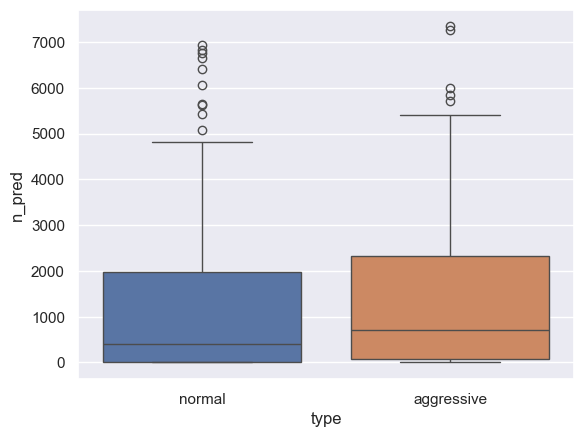

In [33]:
sns.boxplot(data=df[df.n_pred<7500], x='type', y='n_pred', hue='type')


# Recall and precision

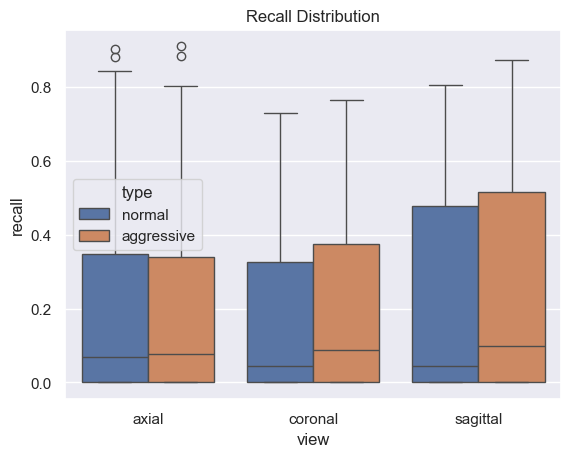

In [34]:
sns.boxplot(x=df['view'], y=df['recall'], hue=df['type'])
plt.title('Recall Distribution')
plt.savefig('./images/view_recall.pdf', bbox_inches='tight', pad_inches=0)

In [42]:
from scipy.stats import ranksums

sample1 = df[(df.view == 'axial') & (df.type == 'normal')]['precision']
sample2 = df[(df.view == 'axial') & (df.type == 'aggressive')]['precision']

ranksums(sample1, sample2)

RanksumsResult(statistic=0.3256270729170536, pvalue=0.7447065264262667)

In [40]:
from scipy.stats import ranksums

sample1 = df[(df.view == 'coronal') & (df.type == 'normal')]['precision']
sample2 = df[(df.view == 'coronal') & (df.type == 'aggressive')]['precision']

ranksums(sample1, sample2)

RanksumsResult(statistic=-0.09418964919088327, pvalue=0.9249585069687841)

In [41]:
from scipy.stats import ranksums

sample1 = df[(df.view == 'sagittal') & (df.type == 'normal')]['precision']
sample2 = df[(df.view == 'sagittal') & (df.type == 'aggressive')]['precision']

ranksums(sample1, sample2)

RanksumsResult(statistic=0.477626131784145, pvalue=0.6329163282364473)

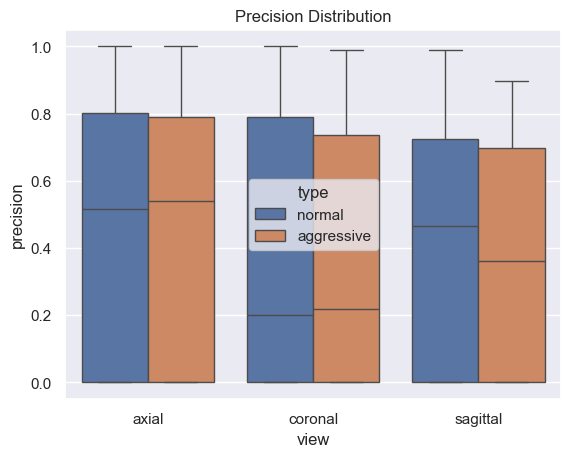

In [55]:
sns.boxplot(x=df['view'], y=df['precision'], hue=df['type'])
plt.title('Precision Distribution')
plt.savefig('./images/view_precision.pdf', bbox_inches='tight', pad_inches=0)

In [57]:
df.groupby(['view', 'type'])[['recall', 'precision']].describe().round(3)

recall                                               \
                     count   mean    std  min  25%    50%    75%    max   
view     type                                                             
axial    aggressive   59.0  0.209  0.265  0.0  0.0  0.077  0.339  0.910   
         normal       59.0  0.209  0.267  0.0  0.0  0.069  0.347  0.901   
coronal  aggressive   59.0  0.198  0.238  0.0  0.0  0.088  0.375  0.765   
         normal       59.0  0.166  0.213  0.0  0.0  0.045  0.326  0.730   
sagittal aggressive   60.0  0.243  0.289  0.0  0.0  0.099  0.516  0.873   
         normal       60.0  0.218  0.277  0.0  0.0  0.046  0.476  0.806   

                    precision                                               
                        count   mean    std  min  25%    50%    75%    max  
view     type                                                               
axial    aggressive      59.0  0.440  0.373  0.0  0.0  0.540  0.790  1.000  
         normal          59.0  0.456  0.390  0.0  0.0  0.518  0.802  1.000  
coronal  aggressive      59.0  0.362  0.355  0.0  0.0  0.218  0.737  0.989  
         normal          59.0  0.362  0.374  0.0  0.0  0.201  0.790  1.000  
sagittal aggressive      60.0  0.352  0.349  0.0  0.0  0.362  0.699  0.899  
         normal          60.0  0.386  0.371  0.0  0.0  0.466  0.725  0.990

# Dilated dice

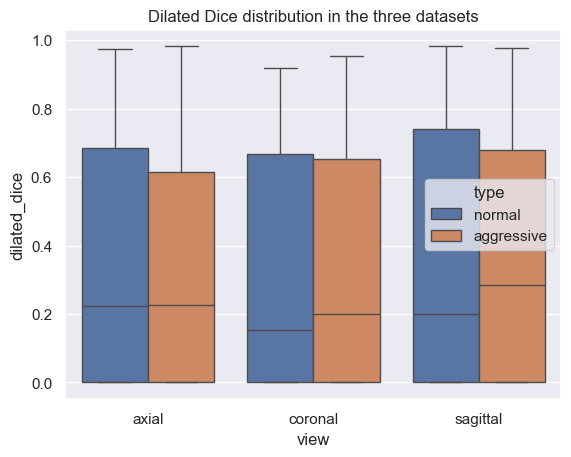

In [59]:
sns.boxplot(x=df['view'], y=df['dilated_dice'], hue=df['type'])
plt.title('Dilated Dice distribution in the three datasets')

plt.savefig('./images/dilated_dice_planes.pdf', bbox_inches='tight', pad_inches=0)

In [43]:
from scipy.stats import ranksums

sample1 = df[(df.view == 'axial') & (df.type == 'normal')]['dilated_dice']
sample2 = df[(df.view == 'axial') & (df.type == 'aggressive')]['dilated_dice']

ranksums(sample1, sample2)

RanksumsResult(statistic=-0.018837929838176653, pvalue=0.984970395549833)

In [47]:
from scipy.stats import ranksums

sample1 = df[(df.view == 'coronal') & (df.type == 'normal')]['dilated_dice']
sample2 = df[(df.view == 'coronal') & (df.type == 'aggressive')]['dilated_dice']

ranksums(sample1, sample2)

RanksumsResult(statistic=-0.5086241056307697, pvalue=0.6110157290140716)

In [46]:
from scipy.stats import ranksums

sample1 = df[(df.view == 'sagittal') & (df.type == 'normal')]['dilated_dice']
sample2 = df[(df.view == 'sagittal') & (df.type == 'aggressive')]['dilated_dice']

ranksums(sample1, sample2)

RanksumsResult(statistic=-0.08397822097303648, pvalue=0.9330737477364626)

In [61]:
df.groupby(['view', 'type'])[['dilated_dice']].describe().round(3)

dilated_dice                                             
                           count   mean    std  min  25%    50%    75%    max
view     type                                                                
axial    aggressive         59.0  0.329  0.339  0.0  0.0  0.226  0.614  0.982
         normal             59.0  0.328  0.352  0.0  0.0  0.223  0.685  0.975
coronal  aggressive         59.0  0.321  0.340  0.0  0.0  0.201  0.654  0.953
         normal             59.0  0.300  0.337  0.0  0.0  0.153  0.667  0.919
sagittal aggressive         60.0  0.357  0.368  0.0  0.0  0.285  0.679  0.977
         normal             60.0  0.340  0.374  0.0  0.0  0.199  0.741  0.982

In [68]:
df_dice = df[['view', 'type', 'dice', 'dilated_dice']]
df_dice ['increment'] = df_dice['dilated_dice'] - df_dice['dice']
df_dice.groupby(['view', 'type'])[['increment']].describe()

/tmp/ipykernel_8331/1691203291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dice ['increment'] = df_dice['dilated_dice'] - df_dice['dice']


increment                                          \
                        count      mean       std  min  25%       50%   
view     type                                                           
axial    aggressive      59.0  0.086194  0.079427  0.0  0.0  0.096145   
         normal          59.0  0.083598  0.082642  0.0  0.0  0.075099   
coronal  aggressive      59.0  0.101252  0.100760  0.0  0.0  0.073107   
         normal          59.0  0.099652  0.108809  0.0  0.0  0.058587   
sagittal aggressive      60.0  0.097211  0.096906  0.0  0.0  0.115247   
         normal          60.0  0.093245  0.095706  0.0  0.0  0.075609   

                                         
                          75%       max  
view     type                            
axial    aggressive  0.152501  0.242668  
         normal      0.154593  0.246389  
coronal  aggressive  0.175172  0.375000  
         normal      0.181533  0.435237  
sagittal aggressive  0.164179  0.344733  
         normal      0.171521  0.324768

In [70]:
df['diff'] = df['dilated_dice'] - df['dice']
df.sort_values('diff', ascending=False)

,fold,patient,dice,TP,TN,FP,FN,n_pred,n_ref,precision,recall,type,view,dilated_dice,diff
117,fold_4,9571.nii,0.333065,207,5912564,255,574,462,781,0.448052,0.265045,normal,coronal,0.768302,0.435237
295,fold_4,9571.nii,0.390789,297,5912377,442,484,739,781,0.401894,0.380282,aggressive,coronal,0.765789,0.375000
347,fold_4,5005234.nii,0.618331,452,6056974,326,232,778,684,0.580977,0.660819,aggressive,sagittal,0.963064,0.344733
288,fold_4,5005234.nii,0.597951,496,5912437,280,387,776,883,0.639175,0.561721,aggressive,coronal,0.922845,0.324894
169,fold_4,5005234.nii,0.615275,431,6057014,286,253,717,684,0.601116,0.630117,normal,sagittal,0.940043,0.324768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,fold_4,5107083.nii,0.000000,0,48964229,0,7547,0,7547,0.000000,0.000000,normal,sagittal,0.000000,0.000000
175,fold_4,928807_1.nii,0.000000,0,56991489,0,8447,0,8447,0.000000,0.000000,normal,sagittal,0.000000,0.000000
177,fold_4,9571.nii,0.000000,0,5166235,0,869,0,869,0.000000,0.000000,normal,sagittal,0.000000,0.000000
179,fold_0,1837909.nii,0.000000,0,9877540,44,816,44,816,0.000000,0.000000,aggressive,axial,0.000000,0.000000


In [74]:
df_dice_0[(df_dice_0.reason == 'hallucination') & (df_dice_0.view == 'axial')].sort_values(by=['n_ref', 'n_pred'], ascending=False).head(20)

,fold,patient,dice,TP,TN,FP,FN,n_pred,n_ref,precision,recall,type,view,dilated_dice,reason
22,fold_1,5146467.nii,0.0,0,4026927,748,8933,748,8933,0.0,0.0,normal,axial,0.000000,hallucination
198,fold_1,507904.nii,0.0,0,5376234,339,5571,339,5571,0.0,0.0,aggressive,axial,0.000000,hallucination
28,fold_2,1715960.nii,0.0,0,3580147,42,3811,42,3811,0.0,0.0,normal,axial,0.000000,hallucination
232,fold_4,5107844.nii,0.0,0,5527674,200,1726,200,1726,0.0,0.0,aggressive,axial,0.000000,hallucination
185,fold_0,5198373.nii,0.0,0,8464524,1083,1593,1083,1593,0.0,0.0,aggressive,axial,0.000000,hallucination
7,fold_0,5198373.nii,0.0,0,8465601,6,1593,6,1593,0.0,0.0,normal,axial,0.000000,hallucination
204,fold_2,1504261.nii,0.0,0,7837960,658,1382,658,1382,0.0,0.0,aggressive,axial,0.000000,hallucination
26,fold_2,1504261.nii,0.0,0,7838103,515,1382,515,1382,0.0,0.0,normal,axial,0.000000,hallucination
192,fold_1,1649024.nii,0.0,0,5604989,466,945,466,945,0.0,0.0,aggressive,axial,0.000000,hallucination
14,fold_1,1649024.nii,0.0,0,5605323,132,945,132,945,0.0,0.0,normal,axial,0.000000,hallucination


In [79]:
df.sort_values('dice', ascending=False).head(20)

,fold,patient,dice,TP,TN,FP,FN,n_pred,n_ref,precision,recall,type,view,dilated_dice,diff
233,fold_4,928807.nii,0.854031,588,4095211,123,78,711,666,0.827004,0.882883,aggressive,axial,0.981845,0.127814
229,fold_4,5016248.nii,0.844946,3632,5152923,435,898,4067,4530,0.893042,0.801766,aggressive,axial,0.971967,0.127021
51,fold_4,5016248.nii,0.844465,3578,5152992,366,952,3944,4530,0.907201,0.789845,normal,axial,0.974510,0.130045
301,fold_0,5016248.nii,0.840942,2929,5430331,622,486,3551,3415,0.824838,0.857687,aggressive,sagittal,0.961958,0.121016
123,fold_0,5016248.nii,0.812509,2728,5430381,572,687,3300,3415,0.826667,0.798829,normal,sagittal,0.945793,0.133284
55,fold_4,928807.nii,0.807983,587,4095134,200,79,787,666,0.745870,0.881381,normal,axial,0.924983,0.116999
44,fold_3,1890778.nii,0.795356,4932,7832530,1999,539,6931,5471,0.711586,0.901481,normal,axial,0.944444,0.149089
275,fold_3,1574753.nii,0.776741,2164,6660144,414,830,2578,2994,0.839410,0.722779,aggressive,coronal,0.945621,0.168880
219,fold_3,1734132.nii,0.773925,6405,3676253,937,2805,7342,9210,0.872378,0.695440,aggressive,axial,0.930280,0.156356
162,fold_3,1856568.nii,0.773645,3047,5874978,907,876,3954,3923,0.770612,0.776702,normal,sagittal,0.981719,0.208074


In [78]:
df[(df.dice > 0.59) & (df.dice < 0.61) & (df.dilated_dice > 0.8) & (df.dilated_dice < 0.84)]

,fold,patient,dice,TP,TN,FP,FN,n_pred,n_ref,precision,recall,type,view,dilated_dice,diff
11,fold_0,568682.nii,0.604819,2008,5601768,544,2080,2552,4088,0.786834,0.491194,normal,axial,0.828765,0.223946
